In [17]:
import pandas as pd
df_tesla = pd.read_csv(r'C:\Users\htran\Downloads\TESLA Search Trend vs Price.csv')
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [18]:
df_tesla.shape

(124, 3)

In [19]:
print(f'Smallest value for Tesla in web search: {df_tesla.TSLA_WEB_SEARCH.min()}')
print(f'Highest value for Tesla in web search: {df_tesla.TSLA_WEB_SEARCH.max()}')

Smallest value for Tesla in web search: 2
Highest value for Tesla in web search: 31


In [20]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [10]:
df_unemployment = pd.read_csv(r'C:\Users\htran\Downloads\UE Benefits Search vs UE Rate 2004-19.csv')
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [11]:
print(f'Smallest value for ue in web search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.min()}')
print(f'Highest value for ue in web search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Smallest value for ue in web search: 14
Highest value for ue in web search: 100


In [21]:
print(f'Missing value for testla search: {df_tesla.isna().values.any()}')
print(f'Missing value for ue search: {df_unemployment.isna().values.any()}')

Missing value for testla search: False
Missing value for ue search: False


In [22]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

In [25]:
type(df_unemployment.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

Convert daily to monthly using resample

In [26]:
df_bitcoin = pd.read_csv(r'C:\Users\htran\Downloads\Daily Bitcoin Price.csv')
df_bitcoin.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


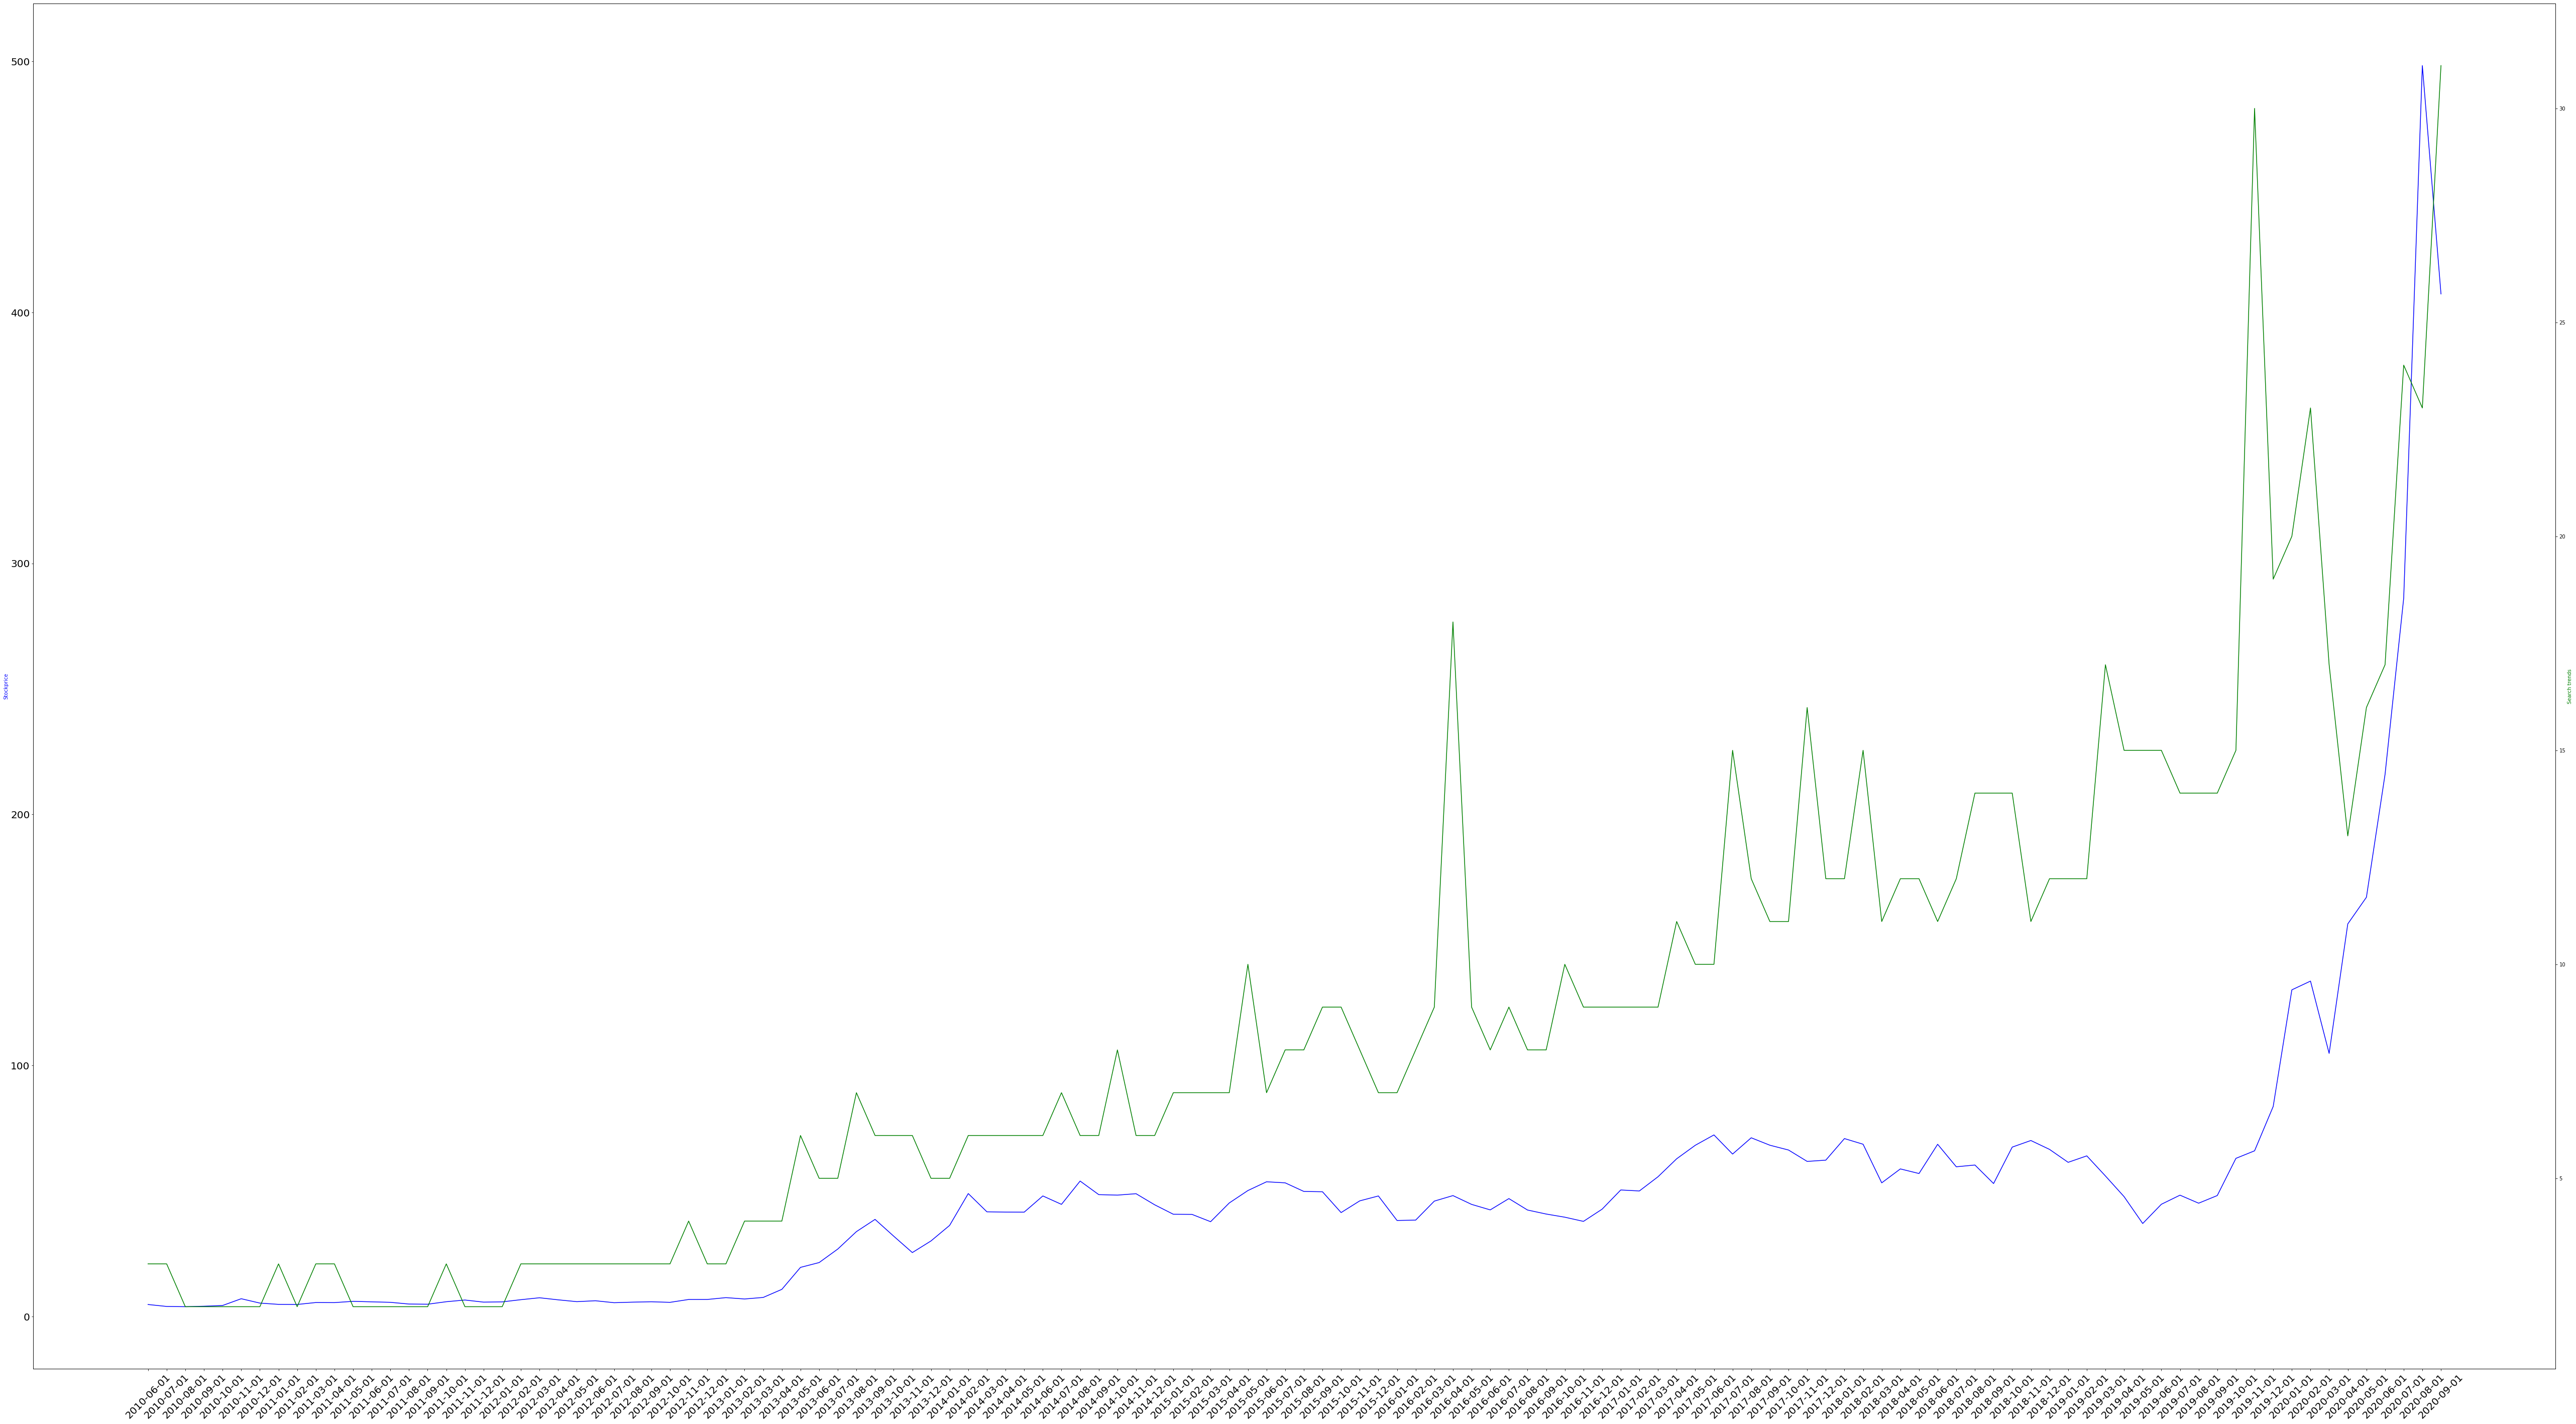

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(90,50))
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

ax1 = plt.gca() # current axes
ax2 = ax1.twinx() # create another axe that shares the same x-axis
#ax1.set_xlabel('Year')

ax1.set_ylabel('Stockprice', color='blue')
ax2.set_ylabel('Search trends', color='green')

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE,color='blue')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH,color='green')

In [44]:
import matplotlib.dates as mdates

In [48]:
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

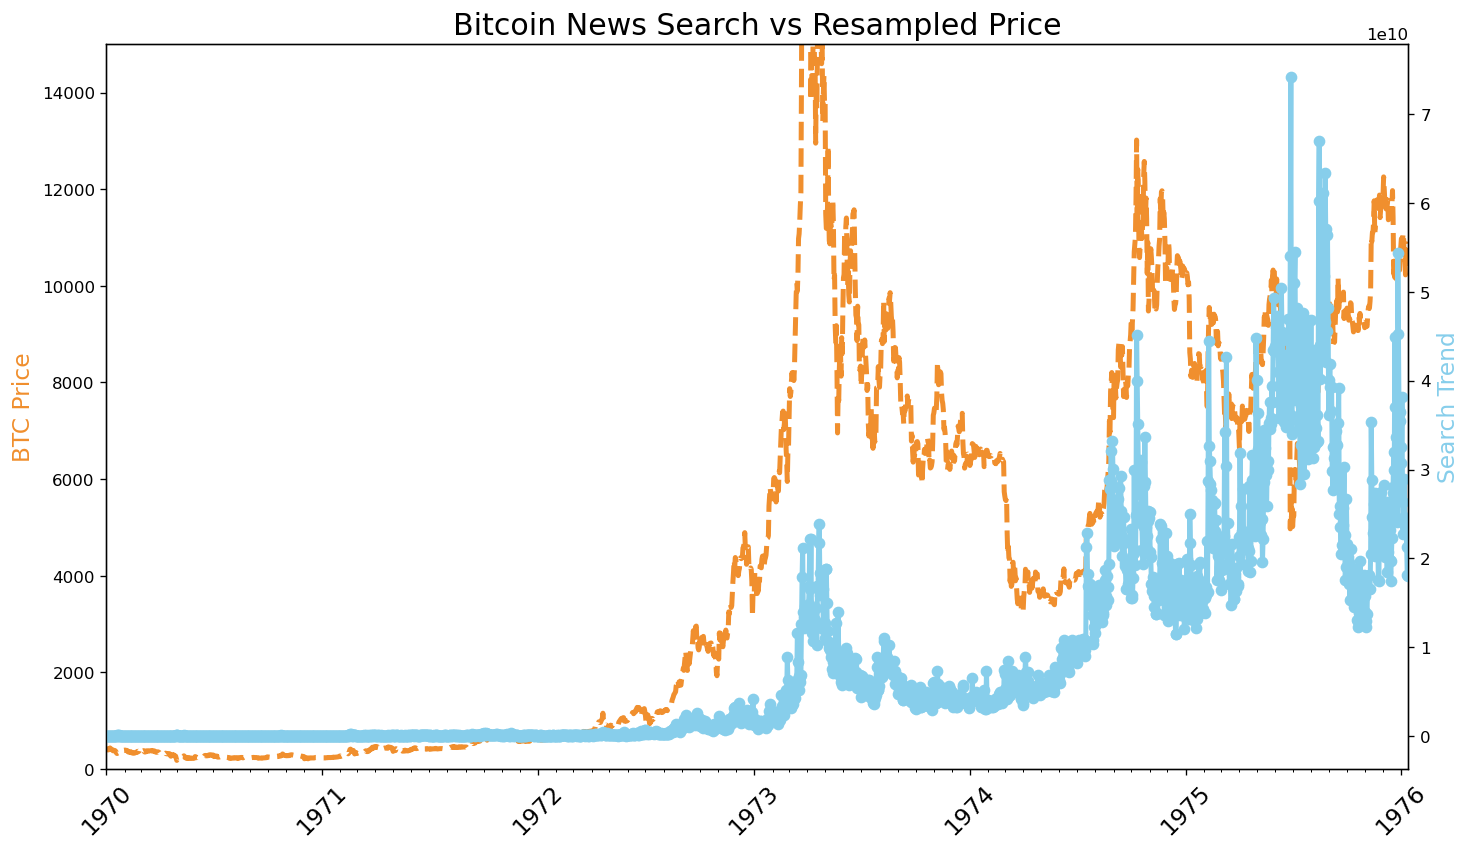

In [50]:
plt.figure(figsize=(14,8), dpi=120)

plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_bitcoin.index.min(), df_bitcoin.index.max()])

# Experiment with the linestyle and markers
ax1.plot(df_bitcoin.index, df_bitcoin.CLOSE, 
         color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_bitcoin.index, df_bitcoin.VOLUME, 
         color='skyblue', linewidth=3, marker='o')

plt.show()